In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/cmo_dmin.nc'
dataset = nc.Dataset(filename)

In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

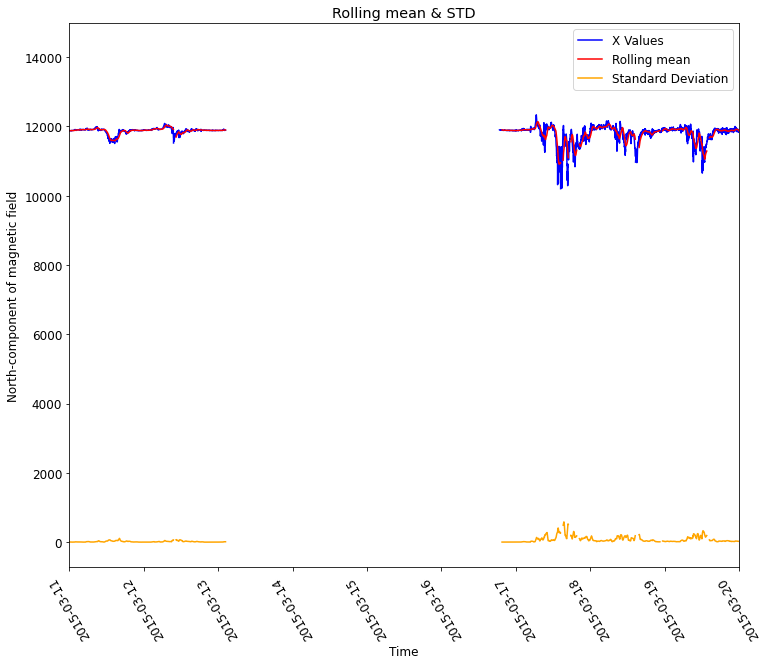

In [5]:
mean = df['X'].rolling(50).mean()
std = df['X'].rolling(50).std()

plt.figure(figsize=(12,10))

#plot rolling stats

xdata = plt.plot(df['Time'], df['X'], label='X Values', color='blue')
xmean = plt.plot(df['Time'], mean, color='red', label='Rolling mean')
xstd = plt.plot(df['Time'], std, color='orange', label='Standard Deviation')

plt.xlim([datetime.datetime(2015, 3, 11, 00), datetime.datetime(2015, 3, 20, 00)])
plt.xlabel('Time')
plt.ylabel('North-component of magnetic field')
plt.title('Rolling mean & STD')
plt.xticks(rotation=120)
plt.legend(loc='best')
plt.show(block=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


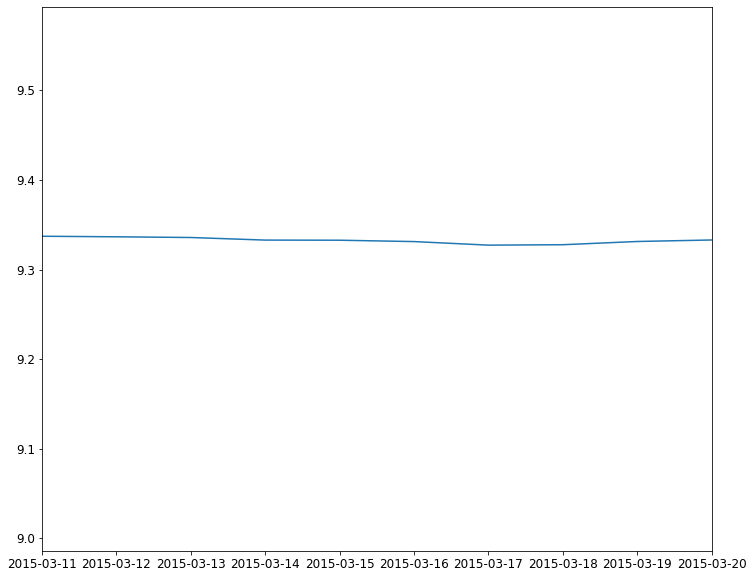

In [9]:
plt.figure(figsize=(12,10))
fig = plt.figure(1)

df_log = np.log(df['X'])

plt.xlim([datetime.datetime(2015, 3, 11, 00), datetime.datetime(2015, 3, 20, 00)])
plt.plot(df_log)

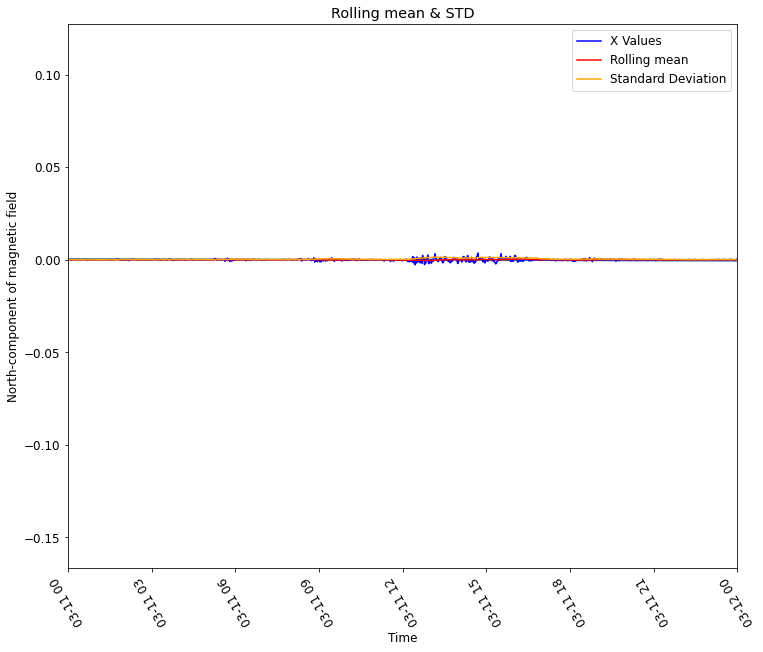

In [11]:
plt.figure(figsize=(12,10))
fig = plt.figure(1)

df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

lmean = df_log_diff.rolling(50).mean()
lstd = df_log_diff.rolling(50).std()

ldata = plt.plot(df['Time'], df_log_diff, label='X Values', color='blue')
lmean = plt.plot(df['Time'], lmean, color='red', label='Rolling mean')
lstd = plt.plot(df['Time'], lstd, color='orange', label='Standard Deviation')

plt.xlim([datetime.datetime(2015, 3, 11, 00), datetime.datetime(2015, 3, 12, 00)])
plt.xlabel('Time')
plt.ylabel('North-component of magnetic field')
plt.title('Rolling mean & STD')
plt.xticks(rotation=120)
plt.legend(loc='best')
plt.show(block=False)